In [1]:
import numpy as np
from scipy.signal import fftconvolve
import matplotlib.pyplot as plt

import pyroomacoustics as pra
from pyroomacoustics.doa import circ_dist

In [101]:
import librosa
import os
BASE_FOLDER =  r'../../'
filepath = r'\dataset\min6dB\slider\id_06\normal\00000022.wav'
ch, sr = librosa.load(os.path.abspath(BASE_FOLDER+filepath), sr=None, mono=False)
fs= sr

azimuth = 180*(np.pi/180) # fan
#azimuth = 90*(np.pi/180) # pump
#azimuth = 270*(np.pi/180) # slider 
#azimuth = 0*(np.pi/180) # valve 


In [102]:
Mics = 8#
#ph0 = 2*np.pi/Mics
ph0 = 0.
MicAd = 68/1000 # 68 mm
room_dim = np.r_[10.,10.] # guessed room 
R = pra.circular_2D_array(room_dim / 2, Mics, ph0, 0.15)

In [103]:
c = 343.    # speed of sound
nfft = 256  # FFT size
freq_hz = np.linspace(100,4000,50)
freq_bins = np.arange(5, 180)
X = np.array([ 
    pra.stft(signal, nfft, nfft // 2, transform=np.fft.rfft).T 
    for signal in ch ])

In [104]:
freq_hz

array([ 100.        ,  179.59183673,  259.18367347,  338.7755102 ,
        418.36734694,  497.95918367,  577.55102041,  657.14285714,
        736.73469388,  816.32653061,  895.91836735,  975.51020408,
       1055.10204082, 1134.69387755, 1214.28571429, 1293.87755102,
       1373.46938776, 1453.06122449, 1532.65306122, 1612.24489796,
       1691.83673469, 1771.42857143, 1851.02040816, 1930.6122449 ,
       2010.20408163, 2089.79591837, 2169.3877551 , 2248.97959184,
       2328.57142857, 2408.16326531, 2487.75510204, 2567.34693878,
       2646.93877551, 2726.53061224, 2806.12244898, 2885.71428571,
       2965.30612245, 3044.89795918, 3124.48979592, 3204.08163265,
       3283.67346939, 3363.26530612, 3442.85714286, 3522.44897959,
       3602.04081633, 3681.63265306, 3761.2244898 , 3840.81632653,
       3920.40816327, 4000.        ])

CSSM
  Recovered azimuth: [323.] degrees
  Error: [143.] degrees


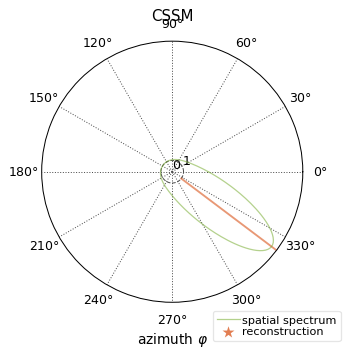

<bound method DOA._check_num_src of <pyroomacoustics.doa.cssm.CSSM object at 0x0000017EF5AAD088>>


In [107]:

algo_names = sorted(pra.doa.algorithms.keys())
algo_names = [algo_names[0]]
for algo_name in algo_names:
    # Construct the new DOA object
    # the max_four parameter is necessary for FRIDA only
    doa = pra.doa.algorithms[algo_name](R, fs, nfft, c=c, max_four=4)

    # this call here perform localization on the frames in X
    doa.locate_sources(X, freq_bins=freq_bins)

    doa.polar_plt_dirac()
    plt.title(algo_name)
    
    # doa.azimuth_recon contains the reconstructed location of the source
    print(algo_name)
    print('  Recovered azimuth:', doa.azimuth_recon / np.pi * 180., 'degrees')
    print('  Error:', circ_dist(azimuth, doa.azimuth_recon) / np.pi * 180., 'degrees')

plt.show()

print(doa._check_num_src)

In [106]:
algo_names

['FRIDA']